## Scraping

In [93]:
from selenium import webdriver
import time

In [355]:
# driver=webdriver.Chrome('D:\\dev\\projetos\\tcc_data_science\\chromedriver.exe')
# regioes = ["vicente-pires"]
# for regiao in regioes:
#     for i in range(2,3):
#         if i==1:
#             driver.get(f'url para o site de apartamentos')
#         else:
#             driver.get(f'url para o site de apartamentos')
#         html = driver.page_source
#         f = open(f'{regiao}_page{i}.html', "w")
#         f.write(html)
#         f.close()

## Beautiful Soup - open file and commands

In [1]:
from bs4 import BeautifulSoup
import os
import requests
import re
import datetime

In [ ]:
#arquivo para logar execução da extração dos dados para eventual verificação
log = open(f'execution_log.txt', "w", encoding="utf-8")
log.write('------------------------------------------------------------------------\n')
log.write(f"inicio_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")

dataset = open(f'dataset.csv', "w", encoding="utf-8")
dataset.write("regiao,area,quartos,banheiros,garagens,condominio,aluguel\n")

# assign directory
directory = 'data_html'

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        with open(f) as html_file:
            soup = BeautifulSoup(html_file, 'lxml')
        log.write(f"filename: {f}\n")    
        propertiesCards = soup.find_all('div', class_='postingCardInfo')
        print("quantidade de cards encontrados: ", len(propertiesCards))
        # print("example: \n", propertiesCards[0])
        for index, apto in enumerate(propertiesCards):
            log.write(f"index: {index}\n")
            preco = ''
            cond = ''
            area = ''
            beds = ''
            baths = ''
            garages = ''
            try:
                log.write(f"in: {apto.find(class_='firstPrice').text}\n")
                preco = re.search(r'\d+\.?\d+', apto.find(class_="firstPrice").text).group(0).replace('.', '')
                log.write(f"out: {preco}\n")
            except Exception as e:
                print(e)
            try:
                log.write(f"in: {apto.find(class_='postingCardExpenses').text}\n")
                cond = re.search(r'\d+\.?\d+', apto.find(class_="postingCardExpenses").text).group(0).replace('.', '')
                log.write(f"out: {cond}\n")
            except Exception as e:
                print(e)
            mainFeatures = apto.find_all('ul', class_="postingCardMainFeatures")
            for item in mainFeatures:
                listOfLis = item.find_all('li')
                for li in listOfLis:
                    if li.find('i', class_="iconArea"):
                        try:
                            log.write(f"in: {li.text}\n")
                            area = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {area}\n")
                        except Exception as e:
                            print(e)                
                    if li.find('i', class_="iconBathrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            baths = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {baths}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconBedrooms"):
                        try:
                            log.write(f"in: {li.text}\n")
                            beds = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '')
                            log.write(f"out: {beds}\n")
                        except Exception as e:
                            print(e)
                    if li.find('i', class_="iconGarage"):
                        try:
                            log.write(f"in: {li.text}\n")
                            garages = re.search(r'\d+\.?\d?', li.text).group(0).replace('.', '') 
                            log.write(f"out: {garages}\n")
                        except Exception as e:
                            print(e)                     
                dataset.write(f'{filename.split("_")[0]},{area},{beds},{baths},{garages},{cond},{preco}\n') 

log.write(f"fim_execucao_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}\n")
log.close()
dataset.close()

In [425]:
import pandas as pd

In [426]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   regiao      1921 non-null   object 
 1   area        1905 non-null   float64
 2   quartos     1531 non-null   float64
 3   banheiros   1713 non-null   float64
 4   garagens    1006 non-null   float64
 5   condominio  1257 non-null   float64
 6   aluguel     1921 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 105.2+ KB


In [427]:
df.head()

,regiao,area,quartos,banheiros,garagens,condominio,aluguel
0,aguas-claras,156.0,4.0,4.0,2.0,1018.0,4800
1,aguas-claras,186.0,4.0,2.0,3.0,1072.0,4500
2,aguas-claras,3636.0,1.0,1.0,1.0,333.0,1550
3,aguas-claras,55.0,2.0,1.0,1.0,80.0,800
4,aguas-claras,40.0,1.0,1.0,1.0,342.0,1100


In [428]:
# links para os outros datasets
# https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_renda_per_capita
# https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_administrativas_do_Distrito_Federal_por_popula%C3%A7%C3%A3o
# http://www.ssp.df.gov.br/dados-por-regiao-administrativa/
d = {'regiao': ['sudoeste', 
                'octogonal', 
                'asa-sul', 
                'asa-norte', 
                'noroeste',
               'taguatinga',
               'aguas-claras',
               'guara',
               'ceilandia',
               'samambaia',
               'sobradinho',
               'gama',
               'park-sul',
               'riacho-fundo',
               'nucleo-bandeirante',
               'vicente-pires',
               'recantodasemas',
               'sao-sebastiao',
               'santamaria',
               'planaltina' 
               ],
     'pib_percapita': [7073.70, 
                       7073.70, 
                       6778.00, 
                       6778.00, 
                       6778.00,
                      2206.60,
                      4407.50,
                      3642.60,
                      1116.10,
                      992.30,
                      2192.30,
                      1596.40,
                      5902.90,
                      1310.40,
                      2381.10,
                      2686.60,
                      857.60,
                      1351.20, 
                      977.00,
                      1140.20]}
df_pib = pd.DataFrame(data=d)
print(df_pib)

                regiao  pib_percapita
0             sudoeste         7073.7
1            octogonal         7073.7
2              asa-sul         6778.0
3            asa-norte         6778.0
4             noroeste         6778.0
5           taguatinga         2206.6
6         aguas-claras         4407.5
7                guara         3642.6
8            ceilandia         1116.1
9            samambaia          992.3
10          sobradinho         2192.3
11                gama         1596.4
12            park-sul         5902.9
13        riacho-fundo         1310.4
14  nucleo-bandeirante         2381.1
15       vicente-pires         2686.6
16      recantodasemas          857.6
17       sao-sebastiao         1351.2
18          santamaria          977.0
19          planaltina         1140.2


In [429]:
df = df.join(df_pib.set_index('regiao'), on='regiao')
df

,regiao,area,quartos,banheiros,garagens,condominio,aluguel,pib_percapita
0,aguas-claras,156.0,4.0,4.0,2.0,1018.0,4800,4407.5
1,aguas-claras,186.0,4.0,2.0,3.0,1072.0,4500,4407.5
2,aguas-claras,3636.0,1.0,1.0,1.0,333.0,1550,4407.5
3,aguas-claras,55.0,2.0,1.0,1.0,80.0,800,4407.5
4,aguas-claras,40.0,1.0,1.0,1.0,342.0,1100,4407.5
...,...,...,...,...,...,...,...,...
1916,vicente-pires,50.0,2.0,1.0,1.0,50.0,1300,2686.6
1917,vicente-pires,35.0,1.0,1.0,NaN,NaN,510,2686.6
1918,vicente-pires,40.0,1.0,1.0,1.0,NaN,810,2686.6
1919,vicente-pires,40.0,1.0,1.0,NaN,180.0,680,2686.6


### Análise Exploratória

#### Boxplots

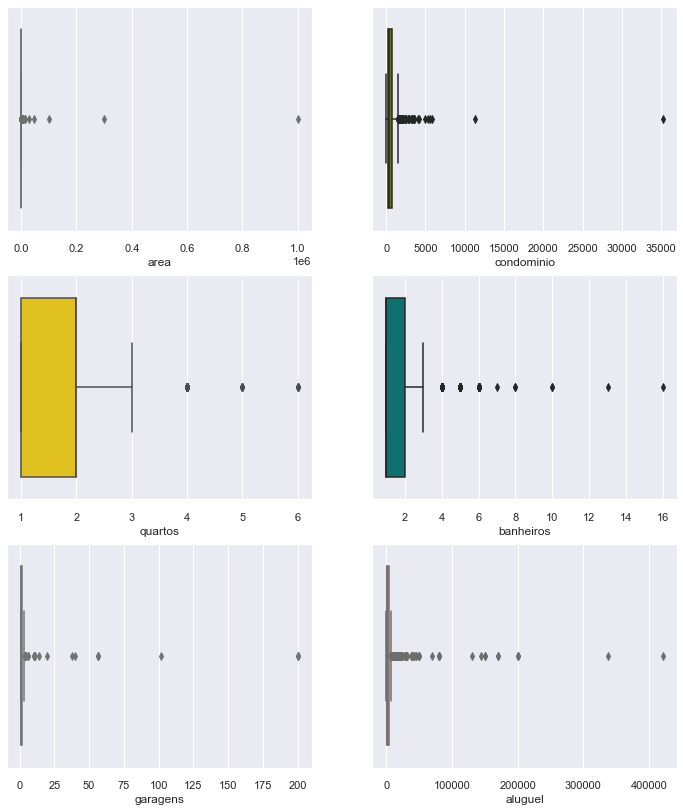

In [430]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig, axs = plt.subplots(3,2, figsize=(12, 14))
    
sns.boxplot(x=df["area"], color="skyblue", ax=axs[0, 0])
sns.boxplot(x=df["condominio"], color="olive", ax=axs[0, 1])
sns.boxplot(x=df["quartos"], color="gold", ax=axs[1, 0])
sns.boxplot(x=df["banheiros"], color="teal", ax=axs[1, 1])
sns.boxplot(x=df["garagens"], color="lightgreen", ax=axs[2, 0])
sns.boxplot(x=df["aluguel"], color="salmon", ax=axs[2, 1])

plt.show()

<AxesSubplot:>

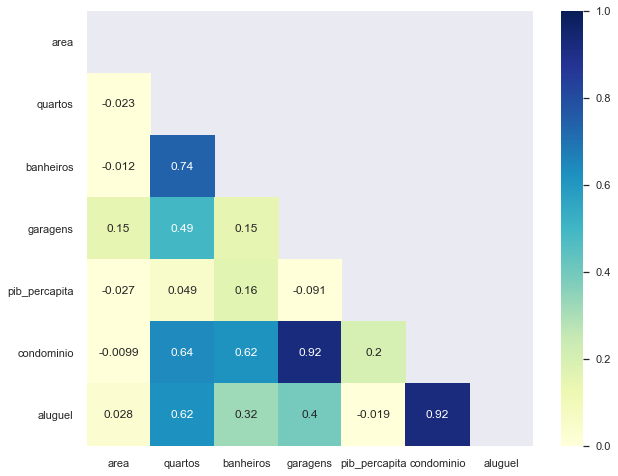

In [431]:
import numpy as np
corr = df[['area', 'quartos', 'banheiros', 'garagens', 'pib_percapita', 'condominio', 'aluguel']].corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=matrix, vmin=0, vmax=1)

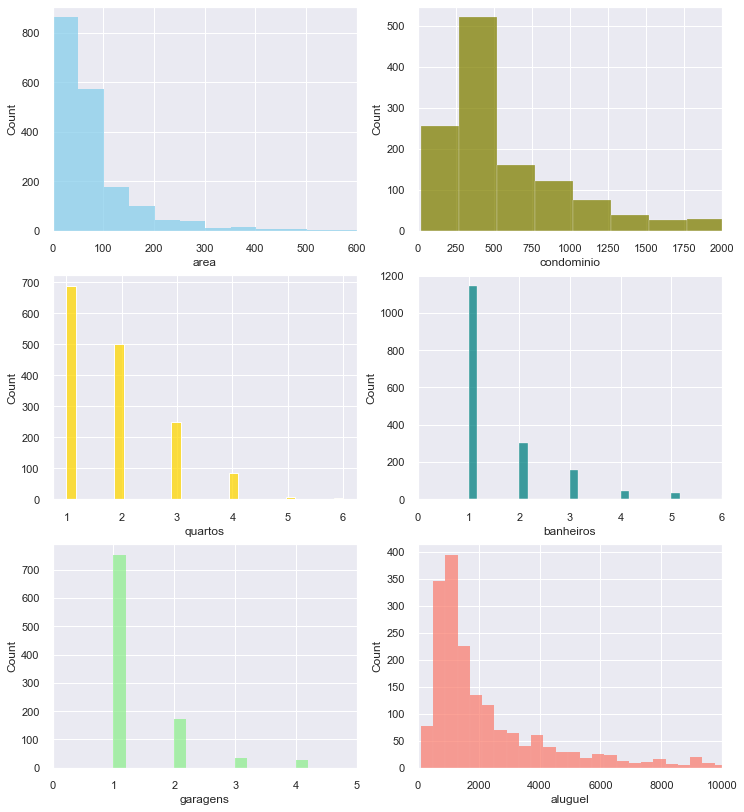

In [432]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig, axs = plt.subplots(3,2, figsize=(12, 14))

sns.histplot(data=df, x="area", color="skyblue", binwidth=50, ax=axs[0, 0]).set(xlim=(0,600))
sns.histplot(data=df, x="condominio", color="olive", binwidth=250, ax=axs[0, 1]).set(xlim=(0,2000))
sns.histplot(data=df, x="quartos", color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="banheiros", color="teal", ax=axs[1, 1]).set(xlim=(0,6))
sns.histplot(data=df, x="garagens", color="lightgreen", ax=axs[2, 0]).set(xlim=(0,5))
sns.histplot(data=df, x="aluguel", color="salmon", ax=axs[2, 1]).set(xlim=(0,10000))

plt.show()

### Limpeza/Transformação dos Dados

#### One Hot Encoding

In [433]:
df_sem_hot = df
df = pd.get_dummies(df)
cols = df.columns.tolist()
cols_new = ['area',
 'quartos',
 'banheiros',
 'garagens',
 'condominio',
 'regiao_aguas-claras',
 'regiao_asa-norte',
 'regiao_asa-sul',
 'regiao_ceilandia',
 'regiao_gama',
 'regiao_guara',
 'regiao_noroeste',
 'regiao_nucleo-bandeirante',
 'regiao_octogonal',
 'regiao_park-sul',
 'regiao_planaltina',
 'regiao_recantodasemas',
 'regiao_riacho-fundo',
 'regiao_samambaia',
 'regiao_santamaria',
 'regiao_sao-sebastiao',
 'regiao_sobradinho',
 'regiao_sudoeste',
 'regiao_taguatinga',
 'regiao_vicente-pires',
 'pib_percapita',
 'aluguel']

columnsX = len(cols_new)

# Reorganizar colunas
df = df[cols_new]
df.describe()

,area,quartos,banheiros,garagens,condominio,regiao_aguas-claras,regiao_asa-norte,regiao_asa-sul,regiao_ceilandia,regiao_gama,...,regiao_riacho-fundo,regiao_samambaia,regiao_santamaria,regiao_sao-sebastiao,regiao_sobradinho,regiao_sudoeste,regiao_taguatinga,regiao_vicente-pires,pib_percapita,aluguel
count,1905.000000,1531.000000,1713.000000,1006.000000,1257.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,...,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,939.120735,1.846506,1.622884,2.340954,658.877486,0.087454,0.109318,0.098386,0.076523,0.043727,...,0.030193,0.073920,0.006767,0.009891,0.046851,0.087454,0.087454,0.015617,4126.656585,4690.862572
std,24060.961871,0.945208,1.198808,11.830984,1191.327752,0.282573,0.312119,0.297914,0.265902,0.204541,...,0.171162,0.261709,0.082006,0.098985,0.211374,0.282573,0.282573,0.124020,2400.418055,17943.735309
min,1.000000,1.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,857.600000,100.000000
25%,36.000000,1.000000,1.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1596.400000,1000.000000
50%,56.000000,2.000000,1.000000,1.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3642.600000,1523.000000
75%,100.000000,2.000000,2.000000,2.000000,787.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6778.000000,3500.000000
max,1000000.000000,6.000000,16.000000,200.000000,35216.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7073.700000,421173.000000


In [434]:
print(df.info())
df = df.dropna(subset=['area'])
df = df.loc[df['area'] < 500]
df = df.loc[df['banheiros'] <= 6]

values = {'garagens': 0, 'banheiros': 1, 'quartos': 1}
df.fillna(value=values, inplace=True)

df = df.dropna()
print(df.info())

df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   area                       1905 non-null   float64
 1   quartos                    1531 non-null   float64
 2   banheiros                  1713 non-null   float64
 3   garagens                   1006 non-null   float64
 4   condominio                 1257 non-null   float64
 5   regiao_aguas-claras        1921 non-null   uint8  
 6   regiao_asa-norte           1921 non-null   uint8  
 7   regiao_asa-sul             1921 non-null   uint8  
 8   regiao_ceilandia           1921 non-null   uint8  
 9   regiao_gama                1921 non-null   uint8  
 10  regiao_guara               1921 non-null   uint8  
 11  regiao_noroeste            1921 non-null   uint8  
 12  regiao_nucleo-bandeirante  1921 non-null   uint8  
 13  regiao_octogonal           1921 non-null   uint8

,count,mean,std,min,25%,50%,75%,max
area,1149.0,71.058312,55.755729,1.0,35.0,52.0,83.0,490.0
quartos,1149.0,1.731070,0.929529,1.0,1.0,1.0,2.0,5.0
banheiros,1149.0,1.596171,1.032833,1.0,1.0,1.0,2.0,6.0
garagens,1149.0,0.805048,0.786610,0.0,0.0,1.0,1.0,6.0
condominio,1149.0,603.198433,543.079517,20.0,294.0,410.0,775.0,5618.0
regiao_aguas-claras,1149.0,0.099217,0.299083,0.0,0.0,0.0,0.0,1.0
regiao_asa-norte,1149.0,0.136641,0.343617,0.0,0.0,0.0,0.0,1.0
regiao_asa-sul,1149.0,0.131419,0.338005,0.0,0.0,0.0,0.0,1.0
regiao_ceilandia,1149.0,0.018277,0.134009,0.0,0.0,0.0,0.0,1.0
regiao_gama,1149.0,0.020017,0.140121,0.0,0.0,0.0,0.0,1.0


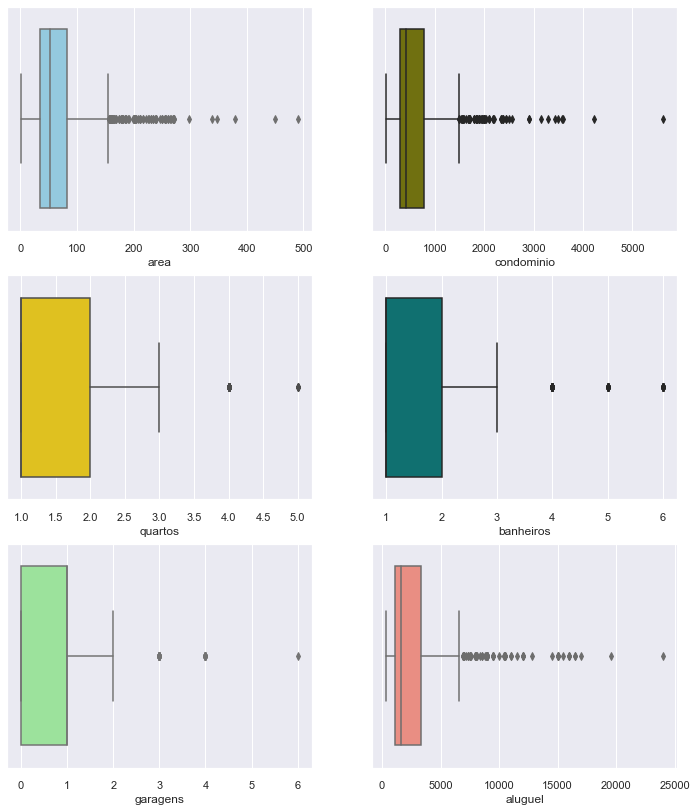

In [435]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig, axs = plt.subplots(3,2, figsize=(12, 14))
    
sns.boxplot(x=df["area"], color="skyblue", ax=axs[0, 0])
sns.boxplot(x=df["condominio"], color="olive", ax=axs[0, 1])
sns.boxplot(x=df["quartos"], color="gold", ax=axs[1, 0])
sns.boxplot(x=df["banheiros"], color="teal", ax=axs[1, 1])
sns.boxplot(x=df["garagens"], color="lightgreen", ax=axs[2, 0])
sns.boxplot(x=df["aluguel"], color="salmon", ax=axs[2, 1])

plt.show()

<Figure size 576x396 with 0 Axes>

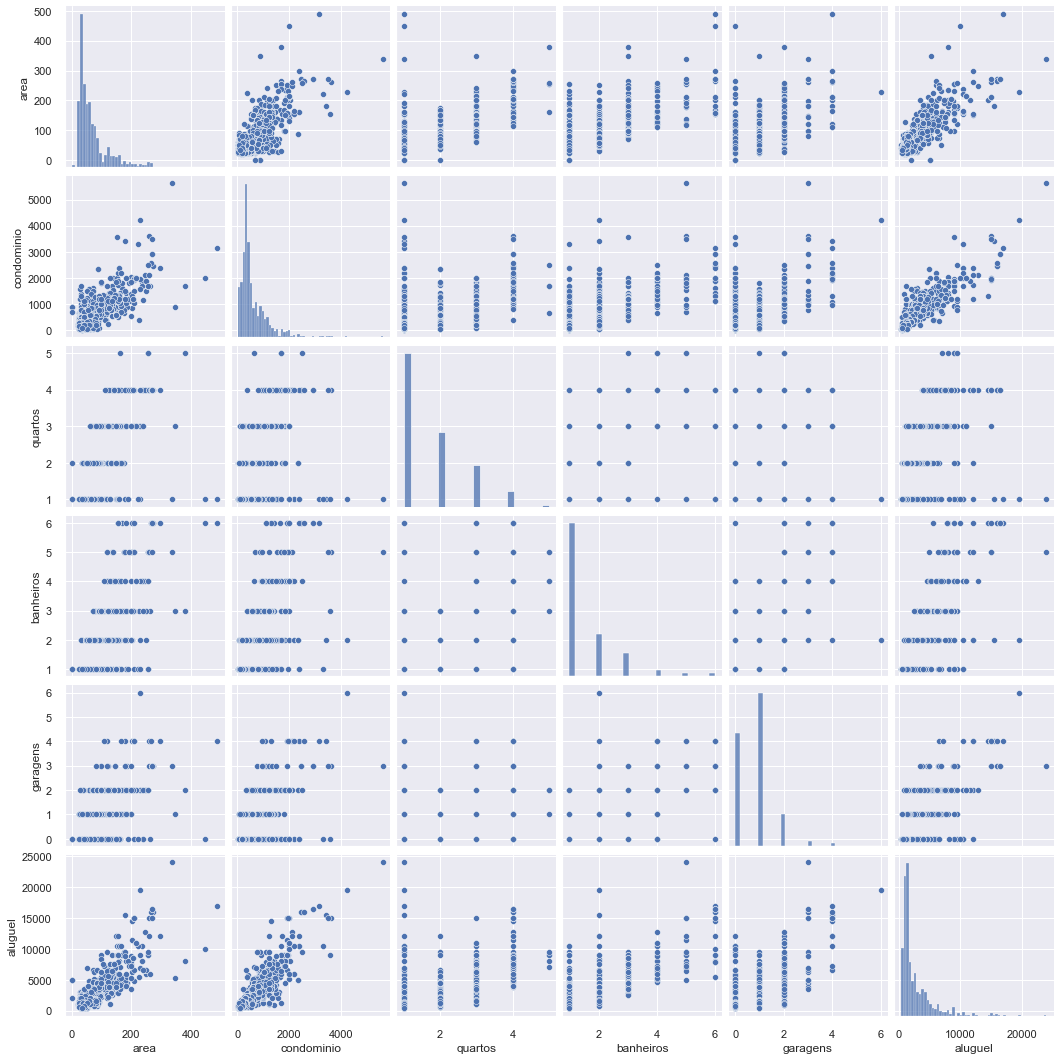

In [436]:
plt.figure()
sns.pairplot(df[['area', 'condominio', 'quartos', 'banheiros', 'garagens', 'aluguel']])
plt.show()

<AxesSubplot:>

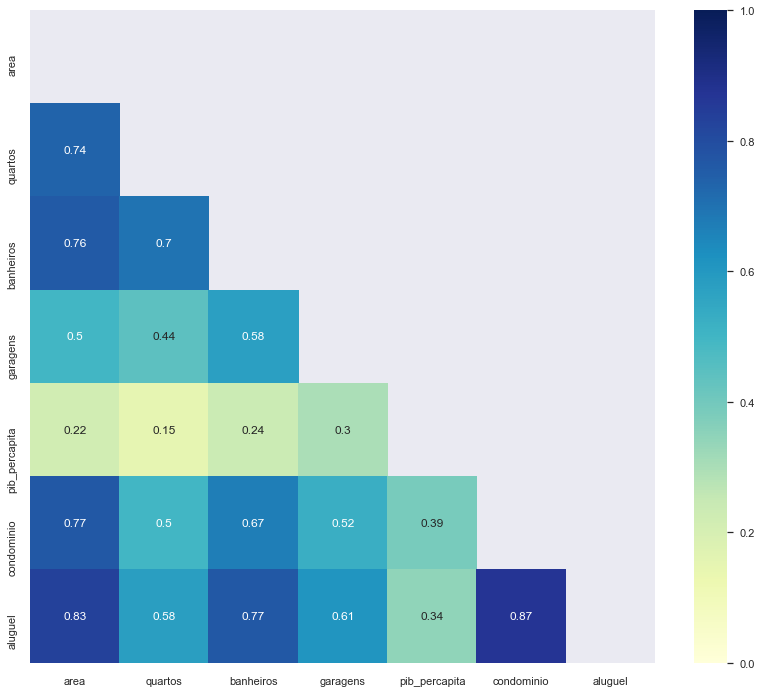

In [437]:
corr = df[['area', 'quartos', 'banheiros', 'garagens', 'pib_percapita', 'condominio', 'aluguel']].corr()
matrix = np.triu(corr)
fig, ax = plt.subplots(figsize=(14,12))  
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask=matrix, vmin=0, vmax=1)

In [438]:
df.shape

(1149, 27)

# Modelos de Machine Learning

In [439]:
from sklearn.model_selection import train_test_split

In [440]:
X = df.iloc[:,0:(columnsX - 1)]
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly.fit(X)
# X = poly.transform(X)

In [441]:
y = df.iloc[:, -1]

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

## Linear Regression

In [443]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
# print("lr.coef_: ", lr.coef_)
# print("lr.intercept_): ", lr.intercept_)
print("training score:\n", lr.score(X_train, y_train))
print("test score\n", lr.score(X_test, y_test))

training score:
 0.86087511711633
test score
 0.8661244234902674


## Ridge

In [444]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
# print("coef_: ", ridge.coef_)
# print("intercept_): ", ridge.intercept_)
print("training score:\n", ridge.score(X_train, y_train))
print("test score\n", ridge.score(X_test, y_test))

training score:
 0.8608587619710172
test score
 0.8664595142564331


## Lasso

In [445]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1).fit(X_train, y_train)
# print("lr.coef_: ", lasso.coef_)
# print("lr.intercept_): ", lasso.intercept_)
print("training score:\n", lasso.score(X_train, y_train))
print("test score\n", lasso.score(X_test, y_test))

training score:
 0.8608728901913758
test score
 0.8661854485085821


## ElasticNet

In [449]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score, GridSearchCV

el = ElasticNet()

scores = cross_val_score(el, X, y, cv=5)

print("CrossV scores: {}".format(scores))
print("CrossV scores mean: {}".format(scores.mean()))

param_grid = {"alpha": [ 0.01, 0.1, 1],
              "l1_ratio": [0.05, 0.5, 5]}

gs = GridSearchCV(el, param_grid, cv=5, return_train_score=True)
gs.fit(X_train, y_train)

print('test set score: {:.2f}'.format(gs.score(X_test, y_test)))
print('best_score: {}'.format(gs.best_score_))
print('best_params: {}'.format(gs.best_params_))
print('best_estimator: {}'.format(gs.best_estimator_))

CrossV scores: [0.76586391 0.81735955 0.82241436 0.86833607 0.89803916]
CrossV scores mean: 0.8344026112308625
test set score: 0.87
best_score: 0.8427380511206456
best_params: {'alpha': 0.1, 'l1_ratio': 0.5}
best_estimator: ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


## Random Forest

In [450]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

scores_rfr = cross_val_score(rfr, X, y, cv=5)

print("CrossV scores: {}".format(scores_rfr))
print("CrossV scores mean: {}".format(scores_rfr.mean()))

param_grid_rfr = {"n_estimators": [ 10, 50, 100, 200, 400],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8]}

gs2 = GridSearchCV(rfr, param_grid_rfr, cv=5, return_train_score=True)
gs2.fit(X_train, y_train)

print('test set score: {:.4f}'.format(gs2.score(X_test, y_test)))
print('best_score: {}'.format(gs2.best_score_))
print('best_params: {}'.format(gs2.best_params_))
print('best_estimator: {}'.format(gs2.best_estimator_))

CrossV scores: [0.77346678 0.75005215 0.8402255  0.9425966  0.89532406]
CrossV scores mean: 0.8403330177542061
test set score: 0.8944
best_score: 0.8775949073809277
best_params: {'min_samples_split': 2, 'n_estimators': 100}
best_estimator: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


### Comparativo Coeficientes Regressão Linear

In [448]:
coefs = pd.DataFrame(list(zip(X_train.columns, lr.coef_, ridge.coef_, lasso.coef_, gs.best_estimator_.coef_)),
                    columns = ['atributo', 'Linear Regression', 'Ridge', 'Lasso', 'ElasticNet'])
coefs

,atributo,Linear Regression,Ridge,Lasso,ElasticNet
0,area,1.627488e+01,16.279584,16.272192,16.346622
1,quartos,-2.677498e+02,-265.803610,-266.962058,-210.543663
2,banheiros,5.463498e+02,543.369122,545.620391,469.481639
3,garagens,3.542053e+02,352.985297,354.085920,320.566462
4,condominio,2.141783e+00,2.145475,2.142211,2.217378
5,regiao_aguas-claras,-1.964232e+02,-192.107662,-194.840464,-99.090380
6,regiao_asa-norte,-9.133197e+01,-94.013310,-117.220903,-103.112559
7,regiao_asa-sul,2.683847e+01,21.714204,-0.000000,-39.345402
8,regiao_ceilandia,-1.738206e+02,-155.778809,-129.473073,-19.944783
9,regiao_gama,6.347097e+02,598.314633,660.873810,171.195939


In [488]:
scores_modelos = pd.DataFrame(data = { 'score treino': [lr.score(X_train, y_train),
                                                        ridge.score(X_train, y_train),
                                                        lasso.score(X_train, y_train),
                                                        gs.score(X_train, y_train), 
                                                        gs2.score(X_train, y_train)], 
                                       'score teste': [lr.score(X_test, y_test),
                                                        ridge.score(X_test, y_test),
                                                        lasso.score(X_test, y_test),
                                                        gs.score(X_test, y_test), 
                                                        gs2.score(X_test, y_test)] },
                    index = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'RandomForest'])
scores_modelos

,score treino,score teste
Linear Regression,0.860875,0.866124
Ridge,0.860859,0.866460
Lasso,0.860873,0.866185
ElasticNet,0.858753,0.869140
RandomForest,0.985406,0.894379


## Pycaret


In [457]:
from pycaret.regression import *
reg1 = setup(data = df, target = 'aluguel', polynomial_features=False)
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,453.5803,910632.4049,875.6941,0.8875,0.2653,0.1878,0.1650
gbr,Gradient Boosting Regressor,549.0277,890402.5786,904.7844,0.8814,0.2967,0.2440,0.0250
xgboost,Extreme Gradient Boosting,489.6387,924115.9957,916.7039,0.8790,0.2792,0.2040,0.2270
rf,Random Forest Regressor,514.5953,927276.3956,905.4660,0.8788,0.2756,0.2130,0.1800
lightgbm,Light Gradient Boosting Machine,533.6301,974132.1853,936.5157,0.8716,0.2855,0.2248,0.0200
br,Bayesian Ridge,668.4076,1124085.5995,1028.8355,0.8495,0.4252,0.3026,0.0070
ridge,Ridge Regression,675.4597,1132530.4677,1032.4572,0.8481,0.4667,0.3116,0.0080
llar,Lasso Least Angle Regression,670.9102,1135648.6622,1032.6661,0.8481,0.4151,0.3054,0.0090
lasso,Lasso Regression,675.5617,1133449.9927,1032.8904,0.8480,0.4688,0.3112,0.0090
lr,Linear Regression,676.7549,1134327.4487,1033.2796,0.8478,0.4642,0.3132,0.4690


In [458]:
reg2 = setup(data = df, target = 'aluguel', polynomial_features=True, polynomial_degree=2)
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,449.3930,857999.0947,881.8869,0.8877,0.2701,0.1863,0.1850
rf,Random Forest Regressor,493.3452,829028.6156,881.0533,0.8854,0.2715,0.2089,0.1890
xgboost,Extreme Gradient Boosting,487.6045,861961.8981,895.1714,0.8821,0.2773,0.2058,0.1780
gbr,Gradient Boosting Regressor,546.5671,867230.7617,904.3568,0.8788,0.2990,0.2466,0.0440
br,Bayesian Ridge,601.1202,872122.9870,921.4054,0.8720,0.3489,0.2772,0.0080
lightgbm,Light Gradient Boosting Machine,532.3708,933773.7557,922.3271,0.8717,0.2802,0.2194,0.0210
lasso,Lasso Regression,609.6013,874112.8158,923.0823,0.8712,0.3705,0.2873,0.0100
ridge,Ridge Regression,610.1861,873739.2188,923.0147,0.8711,0.3767,0.2880,0.0090
lr,Linear Regression,606.1055,880405.2734,925.9520,0.8706,0.3603,0.2819,0.0080
llar,Lasso Least Angle Regression,601.1816,895025.7684,931.7164,0.8705,0.3406,0.2773,0.0090


In [ ]:
xgboost = create_model('xgboost')

In [460]:
xgboost_tuned = tune_model(xgboost, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,650.5962,1609671.9494,1268.7285,0.8711,0.3012,0.2313
1,636.9001,1447258.2595,1203.0205,0.8357,0.3456,0.2503
2,404.2770,601996.6862,775.8845,0.9034,0.2217,0.1722
3,374.3757,343020.0513,585.6791,0.9459,0.2163,0.1697
4,414.9066,514906.4825,717.5698,0.9192,0.2764,0.1896
5,371.9073,425256.1025,652.1166,0.8545,0.2596,0.1923
6,388.9570,376135.5447,613.2989,0.9355,0.2635,0.2062
7,563.8859,1306009.6058,1142.8078,0.8446,0.3302,0.2306
8,418.4872,531027.0739,728.7160,0.9137,0.2811,0.1940
9,499.4944,850100.7570,922.0091,0.8833,0.2834,0.1823


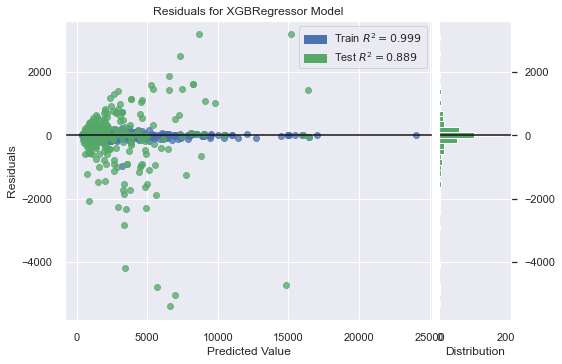

In [461]:
plot_model(xgboost_tuned)

In [ ]:
gbr = create_model('gbr')

In [463]:
gbr_tuned = tune_model(gbr, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,689.7657,1981516.7160,1407.6636,0.8414,0.2818,0.2340
1,615.5559,1129714.9223,1062.8805,0.8717,0.3475,0.2801
2,446.1011,646572.0890,804.0971,0.8962,0.2359,0.1876
3,412.2606,287360.0732,536.0598,0.9547,0.2400,0.2157
4,496.1237,599265.3379,774.1223,0.9059,0.2901,0.2350
5,434.5282,374921.3431,612.3082,0.8718,0.2947,0.2454
6,413.7431,418356.5846,646.8049,0.9283,0.2619,0.2199
7,642.3841,1245740.4215,1116.1274,0.8518,0.3523,0.2940
8,488.3565,578295.7504,760.4576,0.9061,0.2744,0.2291
9,534.9872,787161.2551,887.2211,0.8919,0.2954,0.2152


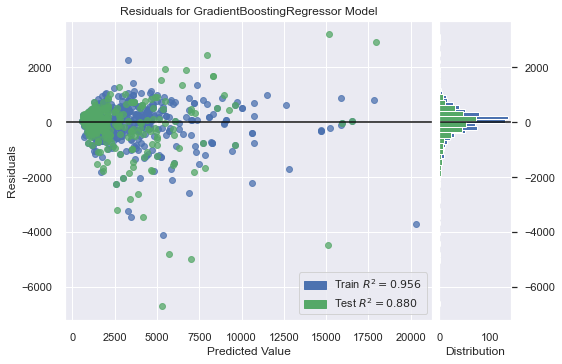

In [464]:
plot_model(gbr_tuned)

In [ ]:
rf = create_model('rf')


In [466]:
rf_tuned = tune_model(rf, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,746.5790,2701796.2298,1643.7142,0.7837,0.2859,0.2337
1,636.0071,1375113.5889,1172.6524,0.8439,0.3630,0.2823
2,457.9658,690011.7652,830.6695,0.8893,0.2292,0.1866
3,478.4968,451642.2618,672.0433,0.9287,0.2475,0.2290
4,466.5372,465837.2647,682.5227,0.9269,0.2661,0.2248
5,449.8540,415546.6506,644.6291,0.8579,0.2887,0.2447
6,384.9045,335138.9935,578.9119,0.9426,0.2399,0.2009
7,654.2658,1252365.8795,1119.0915,0.8510,0.3552,0.3034
8,549.2712,673399.5192,820.6092,0.8906,0.2996,0.2606
9,583.3851,870085.9505,932.7840,0.8805,0.3099,0.2380


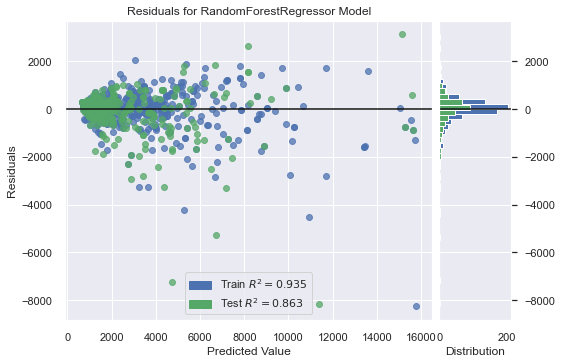

In [467]:
plot_model(rf_tuned)

In [ ]:
et = create_model('et')

In [469]:
et_tuned = tune_model(et, n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,658.6180,2414160.9982,1553.7571,0.8067,0.2725,0.2040
1,612.4842,1283846.4461,1133.0695,0.8543,0.3554,0.2629
2,457.2715,592864.8722,769.9772,0.9049,0.2391,0.1962
3,479.8178,488482.2872,698.9151,0.9229,0.2360,0.2174
4,471.9423,538256.0013,733.6593,0.9155,0.2693,0.2177
5,424.3080,387660.2854,622.6237,0.8674,0.2676,0.2215
6,401.4753,383198.1291,619.0300,0.9343,0.2379,0.1984
7,575.4869,1121743.2125,1059.1238,0.8665,0.3291,0.2584
8,509.5048,641050.1657,800.6561,0.8959,0.2641,0.2227
9,524.4074,774087.2905,879.8223,0.8937,0.2902,0.2063


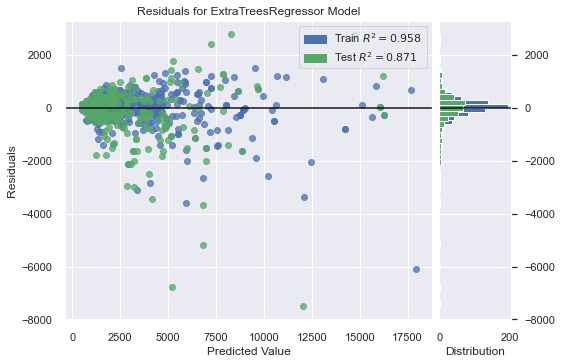

In [470]:
plot_model(et_tuned)

In [471]:
blender_specific = blend_models(estimator_list = [gbr_tuned, rf_tuned, xgboost_tuned, et_tuned])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,673.3502,2105436.9010,1451.0124,0.8314,0.2740,0.2185
1,585.4110,1234645.4413,1111.1460,0.8598,0.3448,0.2575
2,430.9633,588470.3388,767.1182,0.9056,0.2204,0.1794
3,423.4920,345015.1393,587.3799,0.9456,0.2239,0.2027
4,444.0474,472615.9193,687.4707,0.9258,0.2604,0.2118
5,402.7661,348621.0302,590.4414,0.8808,0.2664,0.2195
6,383.6191,331414.6551,575.6862,0.9432,0.2301,0.1968
7,585.5976,1156247.2259,1075.2894,0.8624,0.3313,0.2654
8,481.1187,564950.2027,751.6317,0.9082,0.2680,0.2225
9,502.8505,734163.4404,856.8334,0.8992,0.2846,0.1997


In [492]:
blender_specific.estimators

[('gbr',
  GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.05, loss='ls', max_depth=5,
                            max_features='log2', max_leaf_nodes=None,
                            min_impurity_decrease=0.005, min_impurity_split=None,
                            min_samples_leaf=4, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=140,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=196, subsample=0.85, tol=0.0001,
                            validation_fraction=0.1, verbose=0, warm_start=False)),
 ('rf',
  RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                        max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.5,
                        min_impurity_split=None, min_samples_leaf=4,
 